In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
sns.set()
pd.options.mode.chained_assignment = None
plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams['axes.grid'] = True
plt.style.use('fivethirtyeight')

In [2]:
data = pd.read_csv('BTC-BRL-2020-12-07.csv', index_col=[0])
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-11-07,1400.0,1445.0,1376.5,1445.0,60.0
2015-11-08,1445.0,1465.0,1411.2,1440.9,20.0
2015-11-09,1440.9,1493.4,1400.0,1493.4,90.0
2015-11-10,1493.4,1493.4,1300.0,1340.0,140.0
2015-11-11,1340.0,1365.1,1161.0,1267.0,130.0


In [3]:
def buy_hold_more(data=data, cash=500, day='05'):
    def buy_day_01(data):
        return cash / data['Close'] if str(data['day']).split('-')[-1] == day else 0
    
    data['day'] = data.index
    data['buy_01'] = data.apply(buy_day_01, axis=1)
    data['buy_cumsum'] = data['buy_01'].cumsum()
    data['buy_cum_brl'] = data['buy_cumsum'] * data['Close']
    
    data['BUY_MUL_C'] = data['buy_01'] * data['Close']
    price_mean = data['BUY_MUL_C'].sum() / data['buy_01'].sum()

    roi = ((data['Close'].values[-1] / price_mean) -1) * 100
    
    data['Preço do Bitcoin'] = data['Close']
    data['Patrimônio'] = data['buy_cum_brl']
    
    print(f"Início: {data['day'][0]} \nFim:{data['day'][-1]}")
    print(f"Aportes mensais: R$ {cash :,.2f}")
    print(f"Total de aportes: R$ {data['BUY_MUL_C'].sum() :,.2f}") 
    print(f"Total de Bitcoins: {data['buy_01'].sum() :,.2f} BTC")
    print(f"Preço médio: R$ {price_mean :,.2f}")    
    print(f"Patrimônio Final: R$ {data['buy_cum_brl'].values[-1] :,.2f}" )
    print(f"Retorno: {roi:.2f}%")
    
    ax = data[['Patrimônio', 'Preço do Bitcoin']].plot(
        title=f"Buy and Hold (Buy and Buy More) \n Patrimônio Final: R$ {data['Patrimônio'].values[-1] :,.2f} \n Retorno: {roi:.2f}%"
    )
    
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('R$ {x:,.0f}'))
    plt.savefig(f'{data.index[0]} buy_hold_more')



Início: 2015-12-07 
Fim:2020-12-07
Aportes mensais: R$ 500.00
Total de aportes: R$ 30,000.00
Total de Bitcoins: 4.56 BTC
Preço médio: R$ 6,572.43
Patrimônio Final: R$ 455,448.16
Retorno: 1418.16%


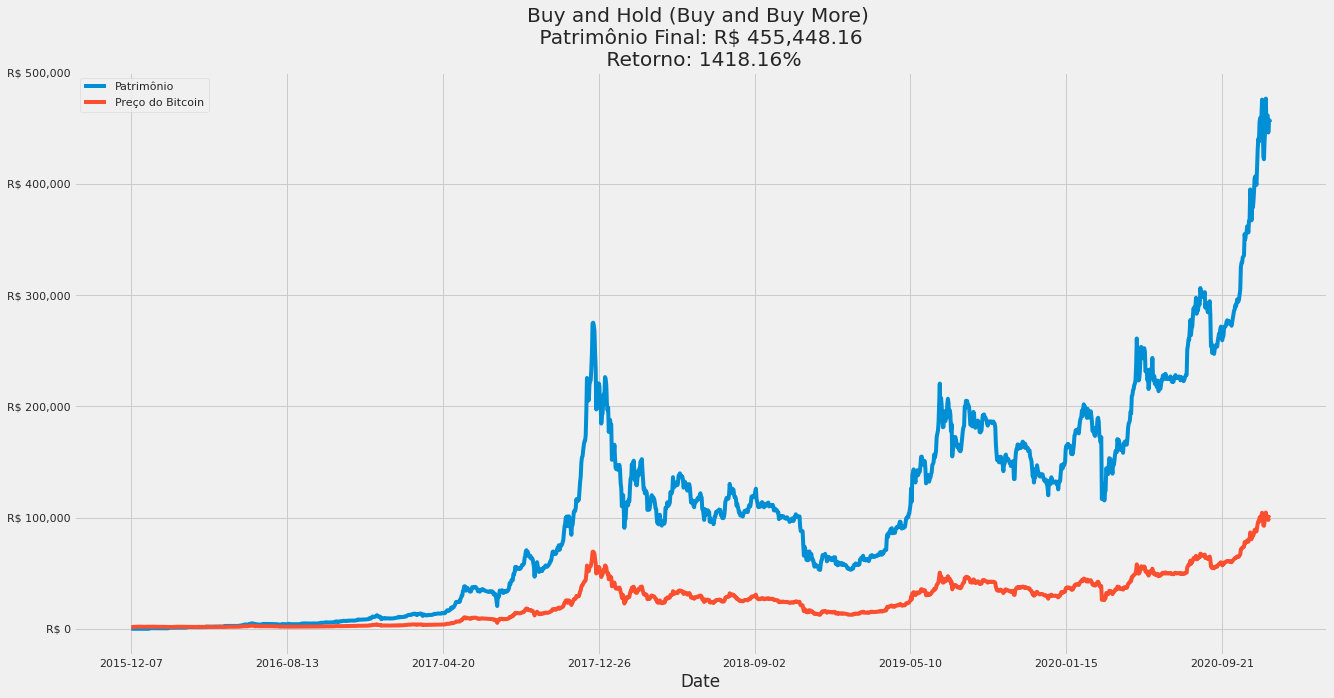

In [7]:
buy_hold_more(data=data.loc['2015-12-07'::], cash=500);     


Início: 2017-12-07 
Fim:2020-12-07
Aportes mensais: R$ 500.00
Total de aportes: R$ 18,000.00
Total de Bitcoins: 0.60 BTC
Preço médio: R$ 30,102.89
Patrimônio Final: R$ 59,663.38
Retorno: 231.46%


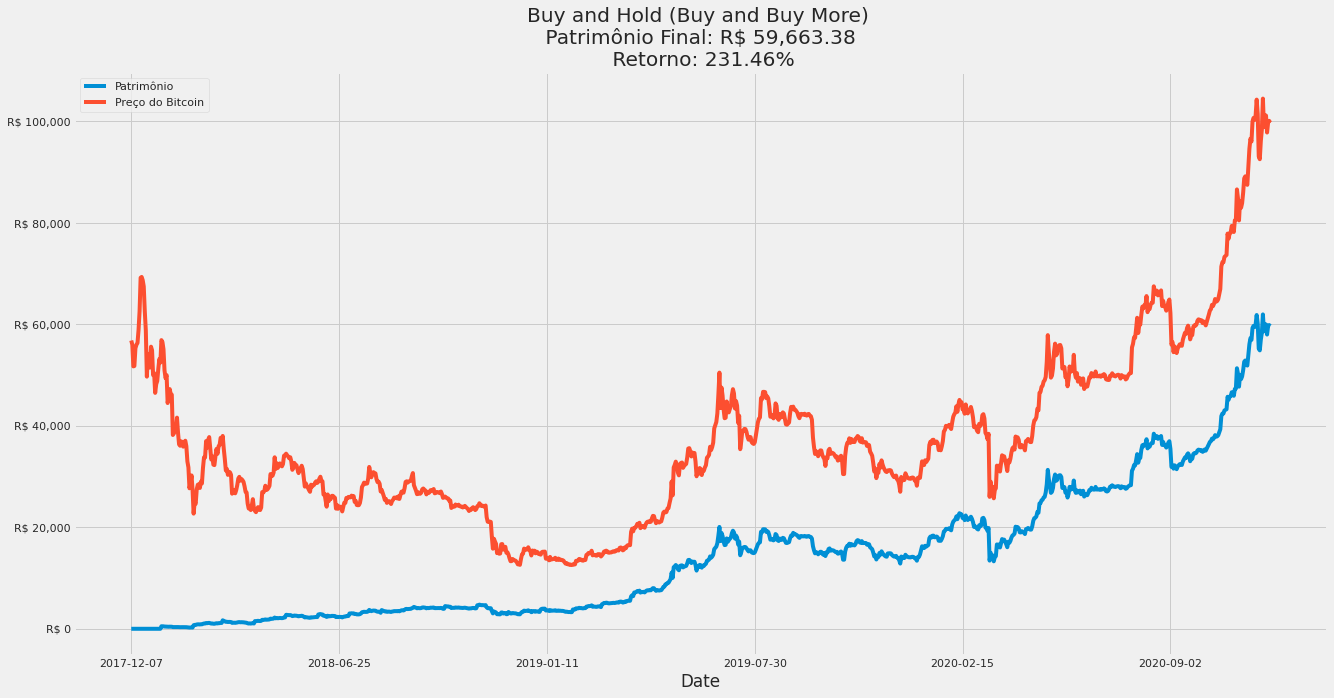

In [8]:
buy_hold_more(data=data.loc['2017-12-07'::], cash=500)    

Início: 2019-12-07 
Fim:2020-12-07
Aportes mensais: R$ 500.00
Total de aportes: R$ 6,000.00
Total de Bitcoins: 0.12 BTC
Preço médio: R$ 49,181.37
Patrimônio Final: R$ 12,172.90
Retorno: 102.88%


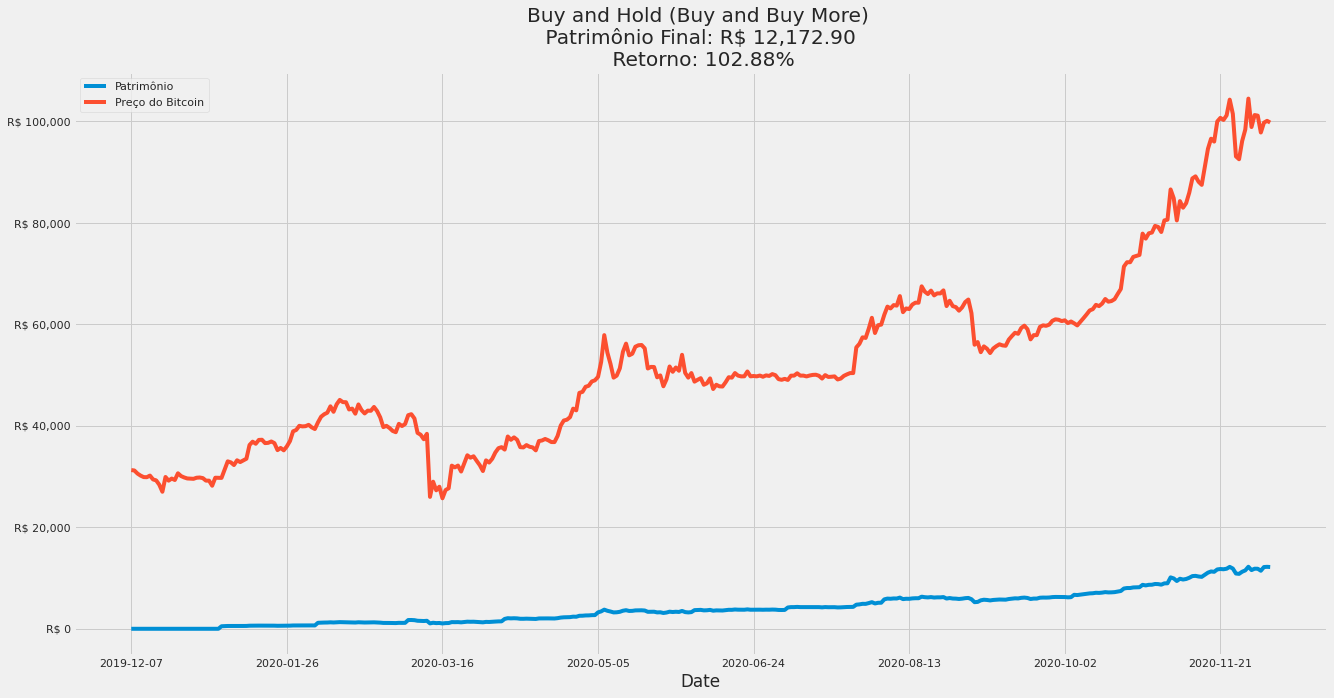

In [9]:
buy_hold_more(data=data.loc['2019-12-07'::], cash=500)    